# Naive Bayes

# Objective
Load data and inspect for any anomalies.

# 1. Load Libraries and data

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

In [3]:
# Ploting Libraries
import matplotlib.pyplot as plt  

In [4]:
# Seaborn for Statistical Plots
import seaborn as sns

In [5]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [6]:
# Stats model
import statsmodels.api as sm

In [7]:
# Let us break the X and y dataframes into training set and test set.
from sklearn.model_selection import train_test_split

In [8]:
# Calculate accuracy measures and confusion matrix
from sklearn import metrics
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
#
from sklearn import preprocessing

In [9]:
# Load Data
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [10]:
# Print Header of the file
loan_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
# On observing the data it is clear there are a few errors such as negative values in the experience column.
# There are also what might seem light outliers in the Mortgage column but on further investigation of the dataset
# it is clear these are values that are valid.
# There is also a very correlation between age and experience 


In [11]:
# Drop the "ID" and "ZIP Code" column as it is useless for the model
loan_df = loan_df.drop('ID', axis=1)
loan_df = loan_df.drop('ZIP Code', axis=1)
# Drop experience due to high correlation
loan_df = loan_df.drop('Experience', axis=1)

In [12]:
# Print Header of the file
loan_df.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [13]:
#import warnings
#warnings.filterwarnings('always')
np.seterr(divide='ignore', invalid='ignore')

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# 2. Check how many records do we have

In [14]:
# Check shape of dataset
loan_df.shape

(5000, 11)

In [15]:
# Test whether there is any null value in the dataset or not.
loan_df.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [16]:
# Check dataset type
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [17]:
# Analysze the distribution of the dependent (Personal Loan) column
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


In [18]:
# Check for negative numbers and change to zero
#num[num < 0] = (np.negative(num))
#loan_df['Experience'].apply(abs)
#loan_df['Experience'] = loan_df['Experience'].abs()

In [19]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


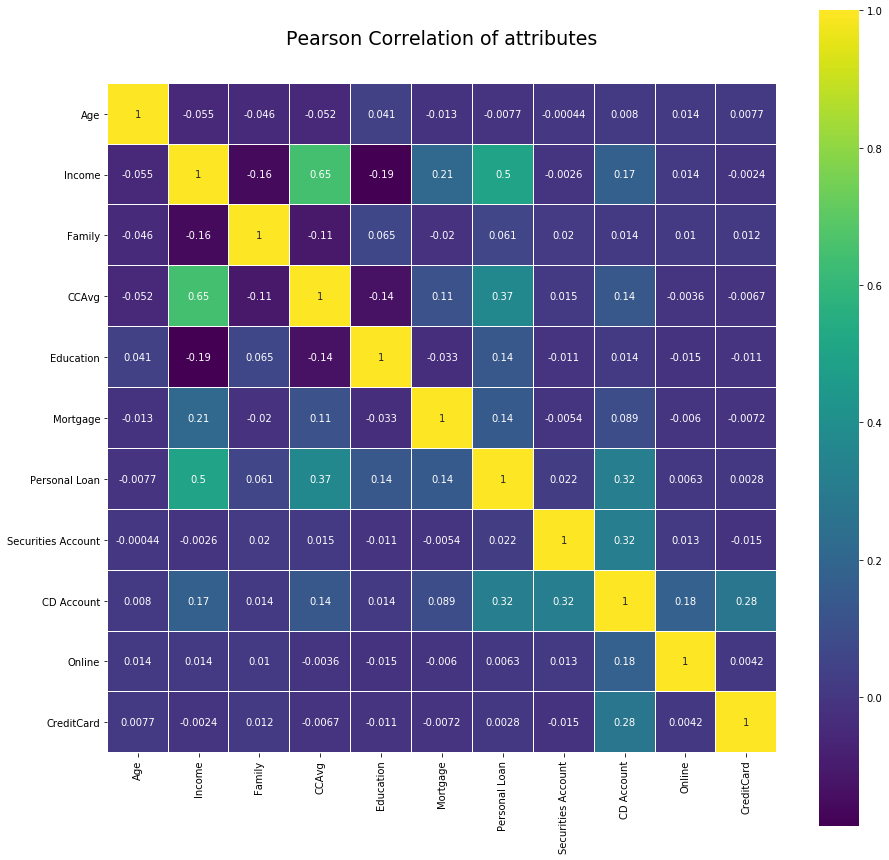

In [20]:
# Check for Correlation
loan_df.corr()

colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(loan_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

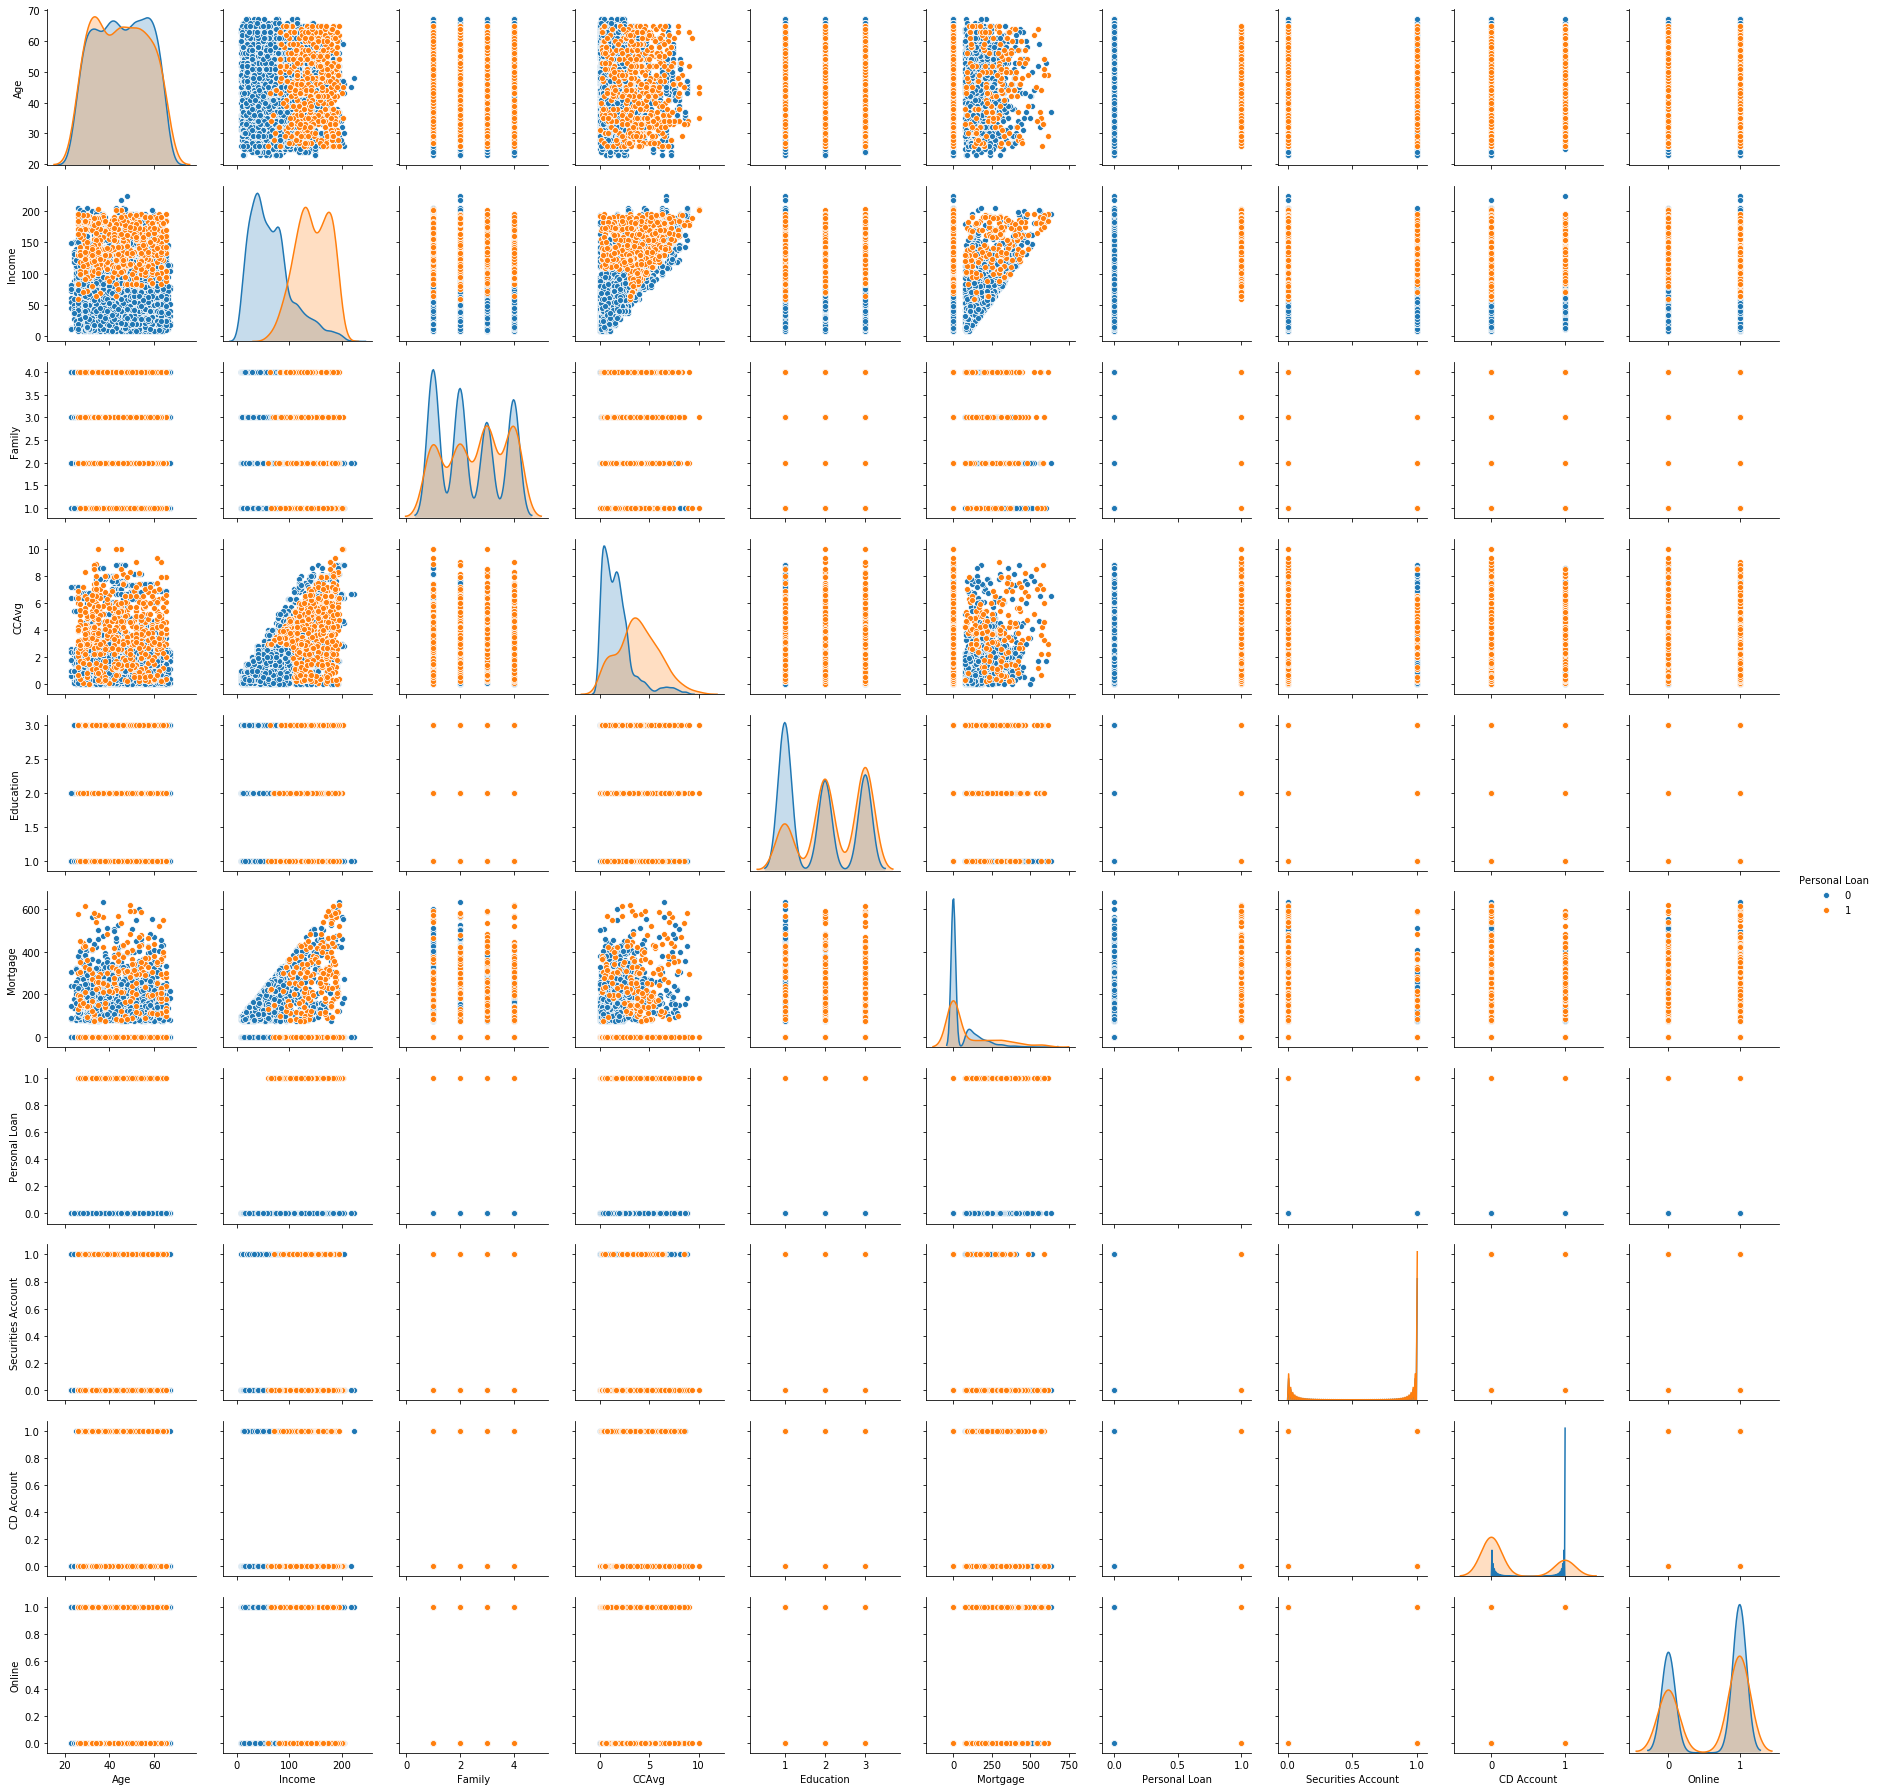

In [21]:
# Scatter Matrix
loan_df_attr = loan_df.iloc[:, 0:10]
# Density Curve
sns.pairplot(loan_df_attr, diag_kind='kde', hue = 'Personal Loan')

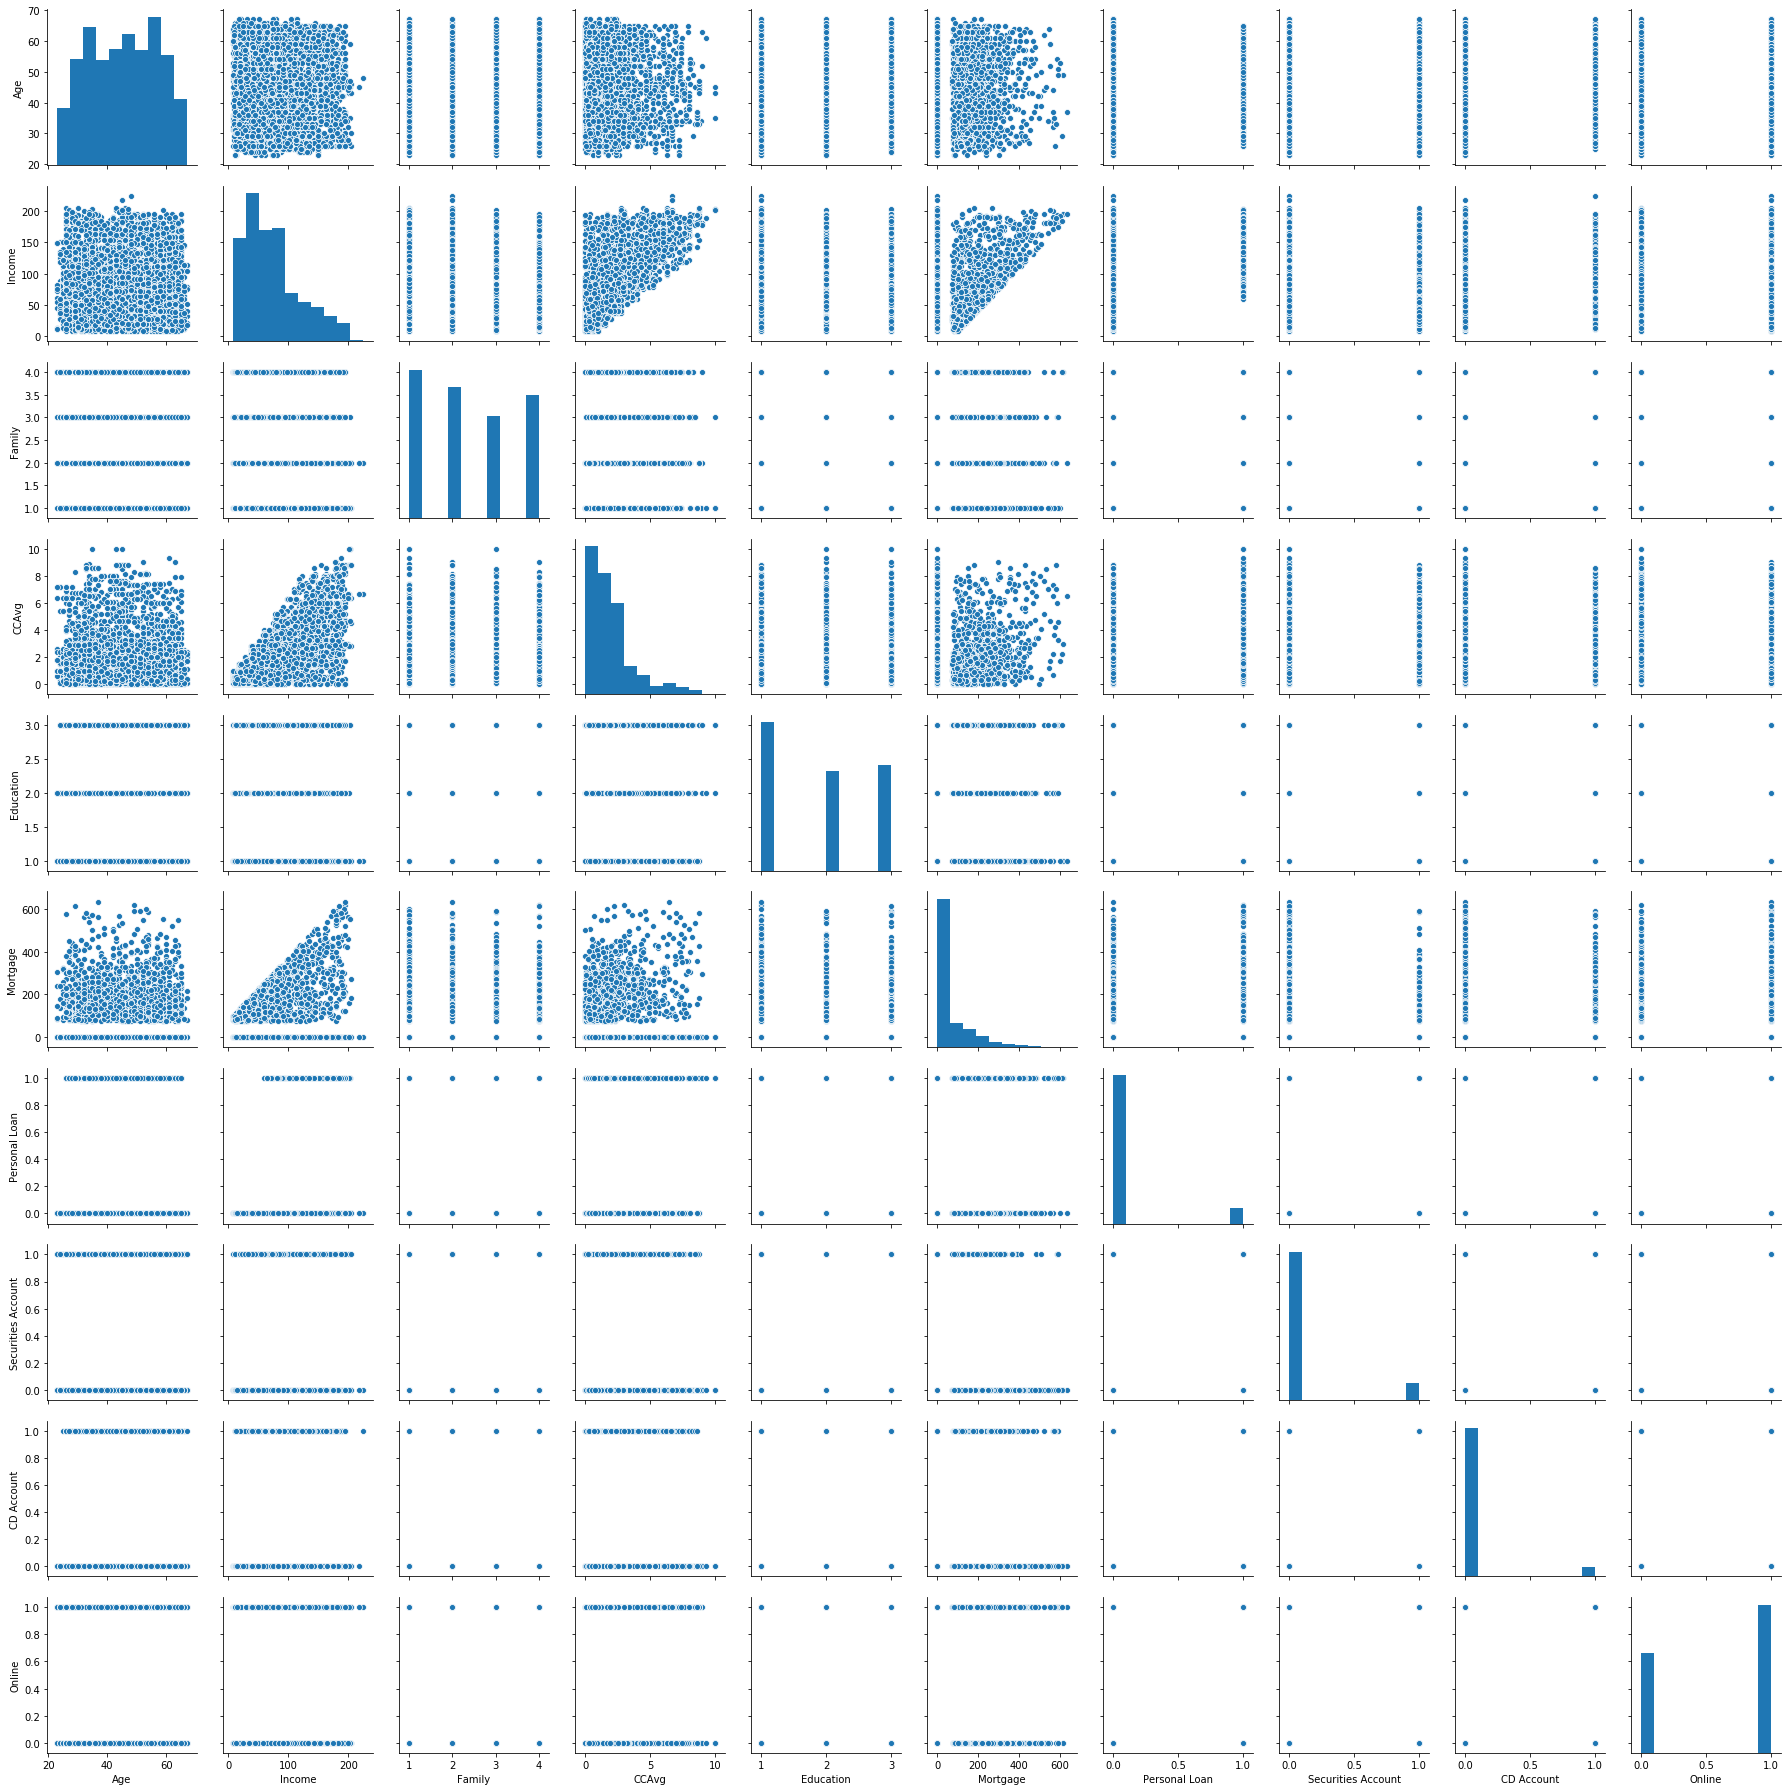

In [22]:
# Plot Histogram
sns.pairplot(loan_df_attr)

In [23]:
# Look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
loan_df.groupby(["Personal Loan"]).count()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480


# Data Slicing

In [24]:
array = loan_df.values
X = loan_df.iloc[:,0:6]
y = loan_df.iloc[:,6]
#X = array[:,0:11] # select all rows and first 11 columns which are the attributes
#Y = array[:,7]   # select all rows and the 8th column which is the classification "Yes", "No" for loans
test_size = 0.30 # taking 70:30 training and test set
seed = 7 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [25]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1362
           1       0.48      0.61      0.54       138

    accuracy                           0.90      1500
   macro avg       0.72      0.77      0.74      1500
weighted avg       0.92      0.90      0.91      1500

[[1272   90]
 [  54   84]]


In [26]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred, normalize = True)

0.904

In [27]:
set(y_test) - set(y_pred)
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.9088956043956044

In [28]:
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted))

0.904
[[1272   90]
 [  54   84]]


In [29]:
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.150110
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.531      
Dependent Variable: Personal Loan    AIC:              1064.7724  
Date:               2019-08-08 18:08 BIC:              1107.8961  
No. Observations:   3500             Log-Likelihood:   -525.39    
Df Model:           6                LL-Null:          -1120.1    
Df Residuals:       3493             LLR p-value:      9.1973e-254
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
-------------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
const      -13.9622    0.7236  -19.2964  0.0000  -15.3804  -12.5441
Age          0.0137    0.0072    1.8997  0.0575   -0.0004    0.0279
Income       0.0516    0.0028   18.7412  0.0000    0.0462    0.0570
Family       0.7384    0.0812    9.0924  0.0000    0.5792    0.8976
CCAvg        0.1608    0.0432    3.7247  0.0002    0.0762    0.2454
Education    1.6349    0.1204   13.5771  0.0000    1.3989    1.8709
Mortgage     0.0008    0.0006    1.3615  0.1734   -0.0004    0.0020
==================================================================

"""